<a href="https://colab.research.google.com/github/Trecha/ProJect/blob/main/Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_t

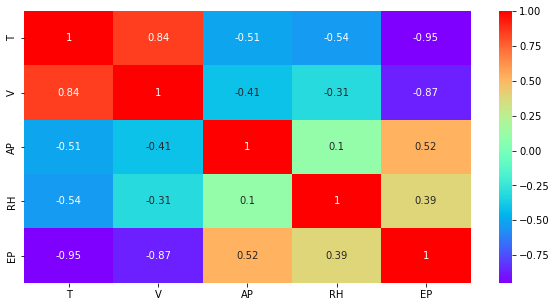

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
start = time.time()

df = pd.read_excel('power.xlsx' )


X=df.drop('EP', axis=1)
y=df['EP']
y=pd.DataFrame(y)


''' Preprocessing- standard-scaling'''
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled)

sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y)
y_scaled=pd.DataFrame(y_scaled)


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X_scaled=X_scaled.values
y_scaled=y_scaled.values

''' get the number of variables that gives u max adjust R sq score,
 default selector.score in linear regression = R2 '''
estimator = LinearRegression() #use regression model for regression problem
list_r2=[]
max_r2 = 0
for i in range(1,len(X_scaled[0])+1):
    selector = RFE(estimator, i, step=1)
    selector = selector.fit(X_scaled, y_scaled)
    adj_r2 = 1 - ((len(X_scaled)-1)/(len(X_scaled)-i-1))*(1-selector.score(X_scaled, y_scaled))
    list_r2.append(adj_r2)# mse = 
    if max_r2 < adj_r2:
        sel_features2 = selector.support_ # 12 features selected exactly to give max adj r2
        max_r2 = adj_r2
        

''' optimal features to use'''        
X = X_scaled[:,sel_features2]
X = pd.DataFrame(X, columns=('T', 'V', 'AP', 'RH'))

y = pd.DataFrame(y_scaled, columns=[('EP')])


'''correlation matrix between X variables'''
cor_matrix=X.astype(float).corr(method='pearson')

plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()


'''split data'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

 

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'MSE')

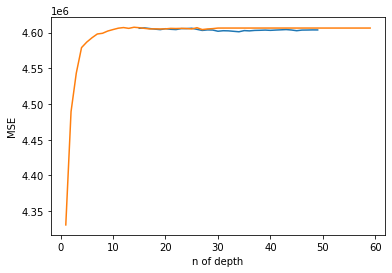

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
test_scores=[]
for n in range(15,50):
    model=RandomForestRegressor(n_estimators=n, max_depth=10, random_state=0)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    test_scores.append(mean_squared_error(y_test, y_pred))
    
plt.plot(range(15, 50), test_scores)
plt.xlabel('n of DTs')
plt.ylabel('MSE')


test_scores1=[]
for k in range(1,60):
    model=RandomForestRegressor(n_estimators=43, max_depth=k, random_state=0)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    test_scores1.append(mean_squared_error(y_test, y_pred))
    
plt.plot(range(1, 60), test_scores1)
plt.xlabel('n of depth')
plt.ylabel('MSE')

In [ ]:
import math
from sklearn.tree import DecisionTreeRegressor
clf= DecisionTreeRegressor()
#20 decision tree
clf.fit(X_train,y_train)
y_pred4 = clf.predict(X_test)


dt = DecisionTreeRegressor(random_state=42)
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                        param_grid=params, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


'''R2 and adjusted R2, and rmse'''
r2=clf.score(X_test,y_test)
print(r2)
adj_r2 = 1 - ((len(X_test)-1)/(len(X_test)-i-1))*(1-clf.score(X_test, y_test))
print(adj_r2)

mse=mean_squared_error(y_test, y_pred4) #biased mean
rmse = math.sqrt(mse)
print(rmse)


-4659729.312358944
-4665581.406942754
2160.1842246064266


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import SCORERS
SCORERS.keys()

kf= KFold(n_splits=5, shuffle= True, random_state=1)

rfr= DecisionTreeRegressor()

rfr1= DecisionTreeRegressor()
rfr1=rfr1.fit(X_train, y_train)

'''Cross validation score (R2 for test data, and full data)'''
r2score_4=cross_val_score(rfr1,X_test,y_test, cv=kf, scoring='r2')
print(r2score_4.mean())
r2score_4b=cross_val_score(rfr,X,y, cv=kf, scoring='r2')
print(r2score_4b.mean())

'''Cross validation score (RMSE for test data, and full data)'''
RMSE_4=np.sqrt(-cross_val_score(rfr1,X_test,y_test, cv=kf, scoring='neg_mean_squared_error'))
print(RMSE_4.mean())
RMSE_4b=np.sqrt(-cross_val_score(rfr,X,y, cv=kf, scoring='neg_mean_squared_error'))
print(RMSE_4b.mean())

0.9146782298208098
0.9281655158605183
0.29303840255020364
0.26729369262244573


RMSE value for k=  1 is: 2157.7815983445494
RMSE value for k=  2 is: 2161.0336055428766
RMSE value for k=  3 is: 2159.3846583604477
RMSE value for k=  4 is: 2158.9380605935858
RMSE value for k=  5 is: 2158.9517395230882
RMSE value for k=  6 is: 2159.8452282134854
RMSE value for k=  7 is: 2160.603299105384
RMSE value for k=  8 is: 2158.159706620338
RMSE value for k=  9 is: 2158.6818745905853
RMSE value for k=  10 is: 2160.0737487441857
RMSE value for k=  11 is: 2160.096358217478
RMSE value for k=  12 is: 2156.970638729169
RMSE value for k=  13 is: 2158.190005581955
RMSE value for k=  14 is: 2159.064391234334
RMSE value for k=  15 is: 2159.827769042931
RMSE value for k=  16 is: 2157.981465557909
RMSE value for k=  17 is: 2159.1949201873613
RMSE value for k=  18 is: 2157.516800173615
RMSE value for k=  19 is: 2160.3124832743692
RMSE value for k=  20 is: 2158.872988248416


<AxesSubplot:>

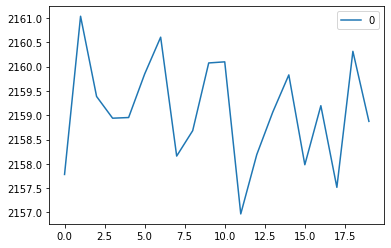

In [ ]:
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = DecisionTreeRegressor()

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
 #plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

MSE value for k=  1 is: 4663449.308640007
MSE value for k=  2 is: 4667385.215878483
MSE value for k=  3 is: 4671392.1487305295
MSE value for k=  4 is: 4652538.079408364
MSE value for k=  5 is: 4656916.973874663
MSE value for k=  6 is: 4665058.941036772
MSE value for k=  7 is: 4658830.815078835
MSE value for k=  8 is: 4659114.568231494
MSE value for k=  9 is: 4663273.565436419
MSE value for k=  10 is: 4667848.573201073
MSE value for k=  11 is: 4663146.782801596
MSE value for k=  12 is: 4668041.862898783
MSE value for k=  13 is: 4668026.155587628
MSE value for k=  14 is: 4671855.3056304585
MSE value for k=  15 is: 4667999.650635296
MSE value for k=  16 is: 4661240.59436469
MSE value for k=  17 is: 4666448.163688365
MSE value for k=  18 is: 4671254.106783899
MSE value for k=  19 is: 4662093.681520893
MSE value for k=  20 is: 4664759.192060842


<AxesSubplot:>

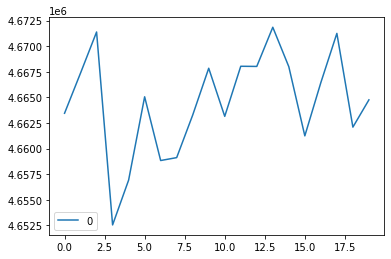

In [ ]:
from math import sqrt
mse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = DecisionTreeRegressor()

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    mse_val.append(error) #store rmse values
    print('MSE value for k= ' , K , 'is:', error)
 #plotting the rmse values against k values
curve = pd.DataFrame(mse_val) #elbow curve 
curve.plot()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


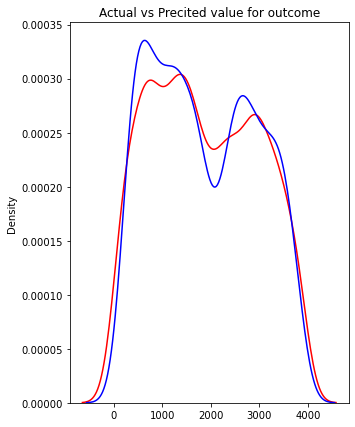

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(pred, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

In [ ]:
end = time.time()
print("Execution time of the program is- ", end-start)

Execution time of the program is-  141.7631824016571


In [ ]:
import math
 
MSE = np.square(np.subtract(pred,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

219.78716380778866
